In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from numpy import inf
from matplotlib import rc
rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [3]:
def getJetData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_pt')

    cols.append('jet_eta')
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('dphi_e_jet')
    cols.append('dR_q_jet')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
def getLeptonData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [5]:
##Selection on event variables
def applyEventCuts(df):
    print '################### ' 
    print 'Applying event selection'
    temp = df 
    temp = applyCut(temp, 'y < 0.85 and y>0.1', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>100', 'Q2>100')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    
    print '################### \n' 
    return temp

In [6]:
## Selection on event and jet variables
def applyJetCuts(df):
    print '################### ' 
    print 'Applying jet selection'
    temp = df
    temp = applyCut(temp, 'jet_pt>10.0', ' jet pT > 10 GeV') 
    temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    print '################### \n' 
    temp.eval('jet_qtnorm= jet_qt/sqrt(Q2)', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/sqrt(jet_pt)', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/sqrt(e_pt)', inplace=True)
    temp.eval('Q = sqrt(Q2)',inplace=True)

    return temp

In [7]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_qt'].mean(), ' mean jet qT'

    #print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q'].mean(), ' mean Q'

   # print df['Q2'].describe()
    return

## Get neutral current data

In [8]:
df_inclusive = {}
##Neutral current
df_inclusive['NC'] = getLeptonData(['NC_10_275.root'])
df_inclusive['NC'] = applyEventCuts(df_inclusive['NC'])

df_inclusive['NC_photon'] = getLeptonData(['NC_purephoton_10_275.root'])
df_inclusive['NC_photon'] = applyEventCuts(df_inclusive['NC_photon'])

## Charged current
df_inclusive['CC'] = getLeptonData(['CC_10_275.root'])
df_inclusive['CC'] = applyEventCuts(df_inclusive['CC'])


Processed NC_10_275.root in 0.5 seconds
################### 
Applying event selection
0.1 < y < 0.85 133361  fraction kept: 53.3
Q2>100 25028  fraction kept: 18.8
################### 


Processed NC_purephoton_10_275.root in 0.1 seconds
################### 
Applying event selection
0.1 < y < 0.85 70890  fraction kept: 70.9
Q2>100 70728  fraction kept: 99.8
################### 


Processed CC_10_275.root in 0.0 seconds
################### 
Applying event selection
0.1 < y < 0.85 19961  fraction kept: 79.8
Q2>100 19961  fraction kept: 100.0
################### 



## Get jet data

In [10]:
df_jet = {}
df_jet['NC'] = getJetData(['NC_10_275.root'])
df_jet['CC'] = getJetData(['CC_10_275.root'])
df_jet['NC_photon'] = getJetData(['NC_purephoton_10_275.root'])


Processed NC_10_275.root in 4.5 seconds

Processed CC_10_275.root in 0.4 seconds

Processed NC_purephoton_10_275.root in 2.2 seconds


In [ ]:
rc('text', usetex=False)
df_jet['CC'].hist(figsize=(24,24),bins=20)
plt.show()

In [ ]:
rc('text', usetex=False)
df_jet['CC'].hist(figsize=(24,24),bins=20)
plt.show()

In [17]:
df_jet['NC'] = applyEventCuts(df_jet['NC'])
df_jet['NC'] = applyJetCuts(df_jet['NC'])

df_jet['CC'] = applyEventCuts(df_jet['CC'])
df_jet['CC'] = applyJetCuts(df_jet['CC'])


df_jet['NC_photon'] = applyEventCuts(df_jet['NC_photon'])
df_jet['NC_photon'] = applyJetCuts(df_jet['NC_photon'])


################### 
Applying event selection
0.1 < y < 0.85 13057  fraction kept: 100.0
Q2>100 13057  fraction kept: 100.0
################### 

################### 
Applying jet selection
 jet pT > 10 GeV 13057  fraction kept: 100.0
dphi_e_jet>3.14159-0.4 13057  fraction kept: 100.0
################### 

################### 
Applying event selection
0.1 < y < 0.85 17752  fraction kept: 100.0
Q2>100 17752  fraction kept: 100.0
################### 

################### 
Applying jet selection
 jet pT > 10 GeV 17752  fraction kept: 100.0
dphi_e_jet>3.14159-0.4 17752  fraction kept: 100.0
################### 

################### 
Applying event selection
0.1 < y < 0.85 37943  fraction kept: 100.0
Q2>100 37943  fraction kept: 100.0
################### 

################### 
Applying jet selection
 jet pT > 10 GeV 37943  fraction kept: 100.0
dphi_e_jet>3.14159-0.4 37943  fraction kept: 100.0
################### 



In [ ]:
rc('text', usetex=False)
df_jet['CC'].hist(figsize=(24,24),bins=20)
plt.show()

In [ ]:
rc('text', usetex=False)
df_jet['NC'].hist(figsize=(24,24),bins=20)
plt.show()

###########
CC
22.548552  mean lepton pt
0.31052163  mean inelasticity
56.453136  mean jet p
22.231297  mean jet pT
1.7732131  mean jet qT
0.24187888  mean x
746.29443  mean Q2
27.282726  mean Q
###########
NC_photon
22.579166  mean lepton pt
0.29700956  mean inelasticity
58.42537  mean jet p
22.171385  mean jet pT
1.769191  mean jet qT
0.24895829  mean x
732.9769  mean Q2
27.041054  mean Q
###########
NC
13.201957  mean lepton pt
0.7573081  mean inelasticity
13.2635355  mean jet p
12.989168  mean jet pT
1.5054282  mean jet qT
0.087666236  mean x
728.7962  mean Q2
26.960989  mean Q


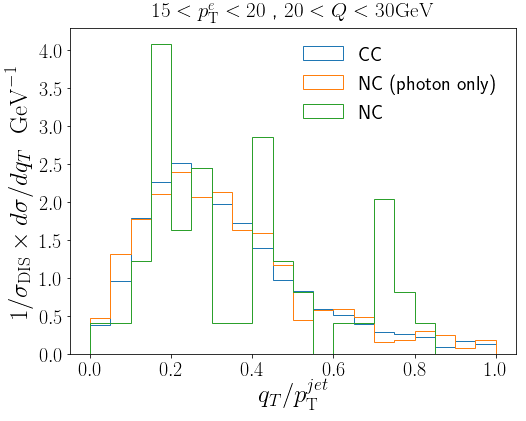

In [21]:
rc('text', usetex=True)

fig = plt.figure(figsize=(8,6))


print '###########'
print 'CC'

df_cut = df_jet['CC'].query('e_pt > %2.2f and e_pt<%2.2f and Q>25 and Q<30 '%(20,25))
printSummary(df_cut)    
plt.hist(df_cut['jet_qtnormjetpt'],bins=20,range=(0,1.0),normed=True,histtype='step',label='CC')    


print '###########'
print 'NC_photon'

df_cut = df_jet['NC_photon'].query('e_pt > %2.2f and e_pt<%2.2f and Q>25 and Q<30'%(20,25))
printSummary(df_cut)    
plt.hist(df_cut['jet_qtnormjetpt'],bins=20,range=(0,1.0),normed=True,histtype='step',label='NC (photon only)')    
 

print '###########'
print 'NC'

df_cut = df_jet['NC'].query('e_pt > %2.2f and e_pt<%2.2f and Q>25 and Q<30'%(10,15))
printSummary(df_cut)    
plt.hist(df_cut['jet_qtnormjetpt'],bins=20,range=(0,1.0),normed=True,histtype='step',label='NC')    
 


plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
plt.ylabel(r'$1/\sigma_{\mathrm{DIS}} \times d\sigma/dq_{T}$ $\ \mathrm{ GeV}^{-1}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

plt.title(r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + r' , $%2.0f<Q<%2.0f \mathrm{GeV}$'%(20,30), fontsize=21)

plt.legend(loc='best',frameon=False,fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')